<a href="https://colab.research.google.com/github/Mund99/Medium_Writing/blob/main/RelativeStrengthIndicator(RSI)_Calculation_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Download data from yahoo finance
ticker = 'AAPL'
start_date = pd.to_datetime('2022-01-01')
end_date = pd.to_datetime('2024-01-01')

df = yf.download(ticker, start_date, end_date)

print(f"\nDataFrame Shape: {df.shape}")
print(df.info())
df.head()

[*********************100%%**********************]  1 of 1 completed


DataFrame Shape: (501, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 501 entries, 2022-01-03 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       501 non-null    float64
 1   High       501 non-null    float64
 2   Low        501 non-null    float64
 3   Close      501 non-null    float64
 4   Adj Close  501 non-null    float64
 5   Volume     501 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 27.4 KB
None


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,177.830002,182.880005,177.710007,182.009995,179.724564,104487900
2022-01-04,182.630005,182.940002,179.119995,179.699997,177.443573,99310400
2022-01-05,179.610001,180.169998,174.639999,174.919998,172.723587,94537600
2022-01-06,172.699997,175.300003,171.639999,172.000000,169.840256,96904000
2022-01-07,172.889999,174.139999,171.029999,172.169998,170.008133,86709100


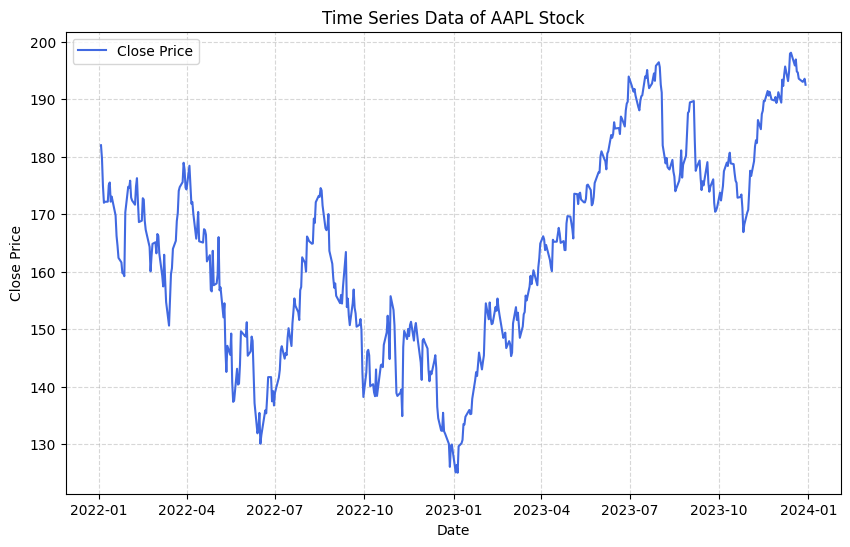

In [3]:
# Plot the close price
plt.figure(figsize=(10,6))

plt.plot(df['Close'], label='Close Price', color='royalblue')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Time Series Data of AAPL Stock')
plt.legend()
plt.grid(visible=True, alpha=0.5, linestyle='--')

plt.show()

# RSI

In [4]:
# Calculate daily price changes
df['Delta'] = df['Close'].diff()
df = df.dropna()

# Define the lookback period for RSI calculation
window_length = 14

# Calculate gains and losses
df['Gain'] = np.where(df['Delta'] > 0, df['Delta'], 0)
df['Loss'] = np.where(df['Delta'] < 0, abs(df['Delta']), 0)

# Calculate average gain and average loss
df['Average Gain'] = df['Gain'].rolling(window=window_length).mean()
df['Average Loss'] = df['Loss'].rolling(window=window_length).mean()
df = df.dropna()

# Calculate relative strength (RS)
df['RS'] = df['Average Gain'] / df['Average Loss']

# Calculate RSI
df['RSI'] = 100 - (100 / (1 + df['RS']))

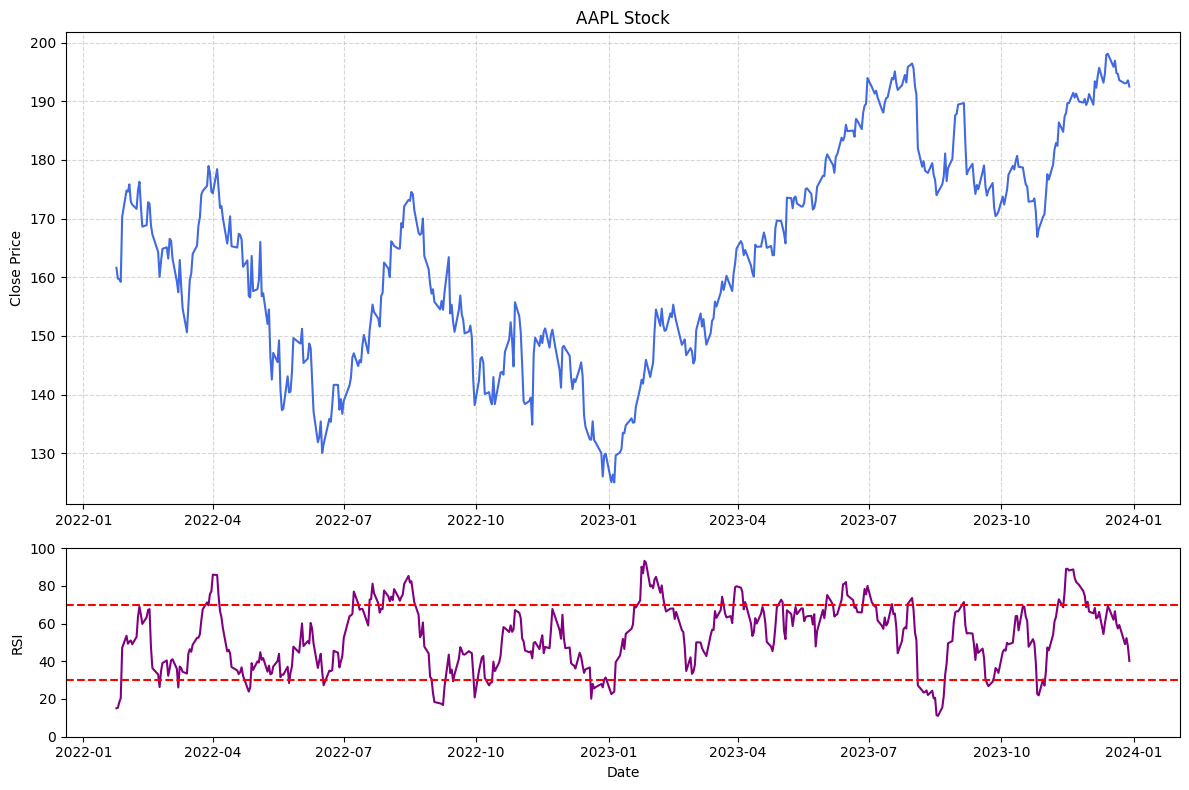

In [5]:
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), gridspec_kw={'height_ratios': [2.5,1]})

# Plot close price
ax1.plot(df.index, df['Close'], label='Close Price', color='royalblue')
ax1.set_ylabel('Close Price')
ax1.set_title('AAPL Stock')
ax1.grid(visible=True, alpha=0.5, linestyle='--')

# Plot RSI
ax2.plot(df.index, df['RSI'], label='RSI', color='Purple')
ax2.axhline(y=70, color='red', linestyle='--')  # Overbought threshold
ax2.axhline(y=30, color='red', linestyle='--')  # Oversold threshold
ax2.set_ylim([0 , 100])
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')

# Show plot
plt.tight_layout()
plt.show()

In [20]:
# Import necessary libraries
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Create Figure
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, row_heights=[0.7, 0.3],
                    vertical_spacing=0.15,  # Adjust vertical spacing between subplots
                    subplot_titles=("Candlestick Chart", "RSI"))  # Add subplot titles


# Subplot 1: Plot candlestick chart
fig.add_trace(go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close'],
    increasing_line_color='#00cc96',  # Green for increasing
    decreasing_line_color='#ff3e3e',  # Red for decreasing
    showlegend=False
), row=1, col=1)  # Specify row and column indices
fig.update_yaxes(fixedrange=False, row=1, col=1)


# Subplot 2: Plot RSI
fig.add_trace(go.Scatter(
    x=df.index,
    y=df['RSI'],
    mode='lines',  # No markers for RSI
    line=dict(color='blue', width=2),  # Adjust line color and width
    showlegend=False,
), row=2, col=1)

# Add upper/lower bounds
fig.update_yaxes(range=[-10, 110], row=2, col=1, fixedrange=True)
fig.add_hline(y=0, col=1, row=2, line_color="black", line_width=1.5)
fig.add_hline(y=100, col=1, row=2, line_color="black", line_width=1.5)

# Add overbought/oversold
fig.add_hline(y=30, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')
fig.add_hline(y=70, col=1, row=2, line_color='#FF0000', line_width=1, line_dash='dash')

# Update layout with zoom and pan tools enabled
layout = go.Layout(
    title='Candlestick Chart and RSI Subplots',
    title_font=dict(size=20),  # Adjust title font size
    plot_bgcolor='#f2f2f2',  # Light gray background
    yaxis=dict(title='Price', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    yaxis2=dict(title='RSI', showgrid=True, gridcolor='#cccccc', tickfont=dict(size=12)),
    height=800,
    width=1200,
    xaxis_rangeslider=dict(visible=True, thickness=0.03),
    xaxis=dict(type='category')
)

# Update the layout of the entire figure
fig.update_layout(layout)
fig.show()